In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df1 = df.copy()

In [8]:
df1.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [9]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
integer_features = df1.select_dtypes(include='integer').columns
float_features = df1.select_dtypes(include='float').columns
object_features = df1.select_dtypes(include='object').columns
number_features = integer_features.append(float_features)
print(integer_features)
print(float_features)
print(object_features)
print(number_features)

Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')
Index(['Balance', 'EstimatedSalary'], dtype='object')
Index(['Surname', 'Geography', 'Gender'], dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Balance', 'EstimatedSalary'],
      dtype='object')


In [11]:
df1[number_features].corr()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,-0.005458,0.025651,-0.027094,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,-0.011721,0.085472,0.285323,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,0.022583,-0.028362,-0.014001,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,0.003183,0.009612,-0.047820,-0.304180,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,0.003183,1.000000,-0.011866,-0.007138,-0.014858,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,0.009612,-0.011866,1.000000,-0.156128,-0.010084,-0.011421
Exited,-0.027094,0.285323,-0.014001,-0.047820,-0.007138,-0.156128,1.000000,0.118533,0.012097
Balance,0.006268,0.028308,-0.012254,-0.304180,-0.014858,-0.010084,0.118533,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,-0.009933,-0.011421,0.012097,0.012797,1.000000


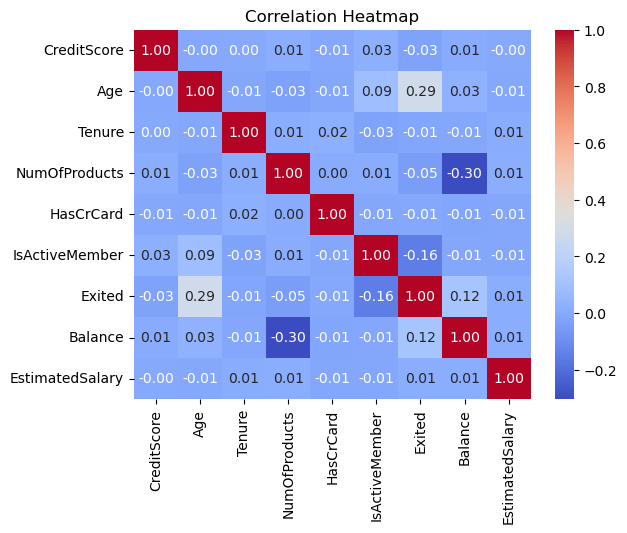

In [12]:
sns.heatmap(df1[number_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

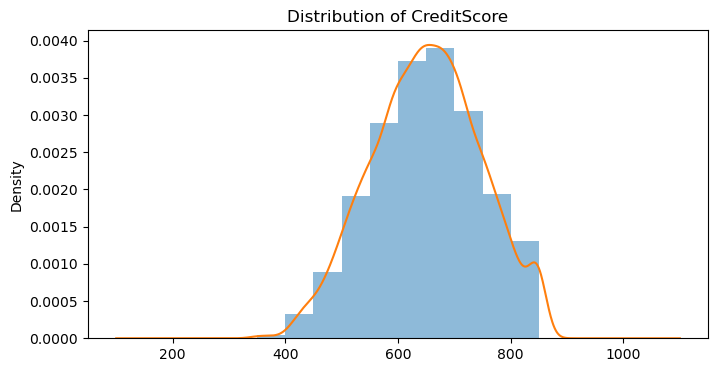

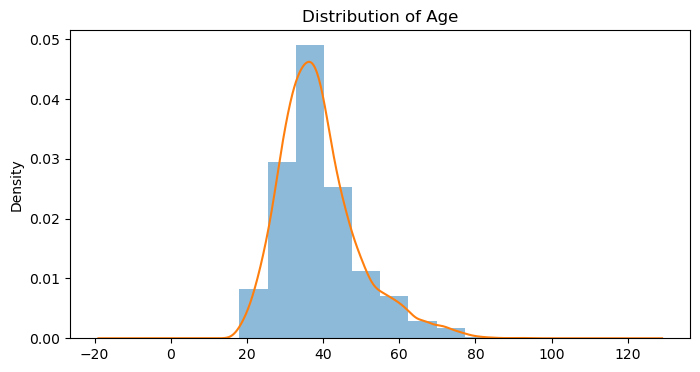

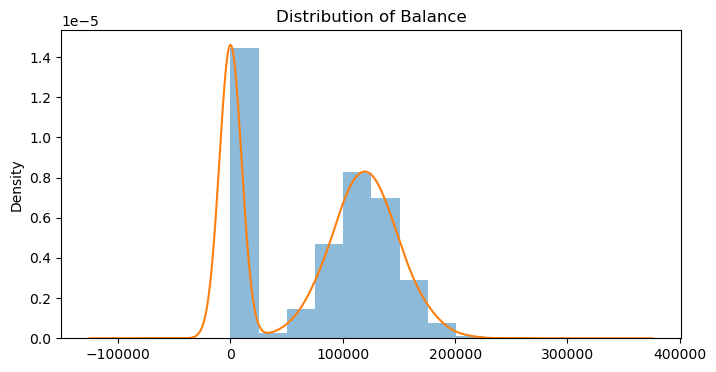

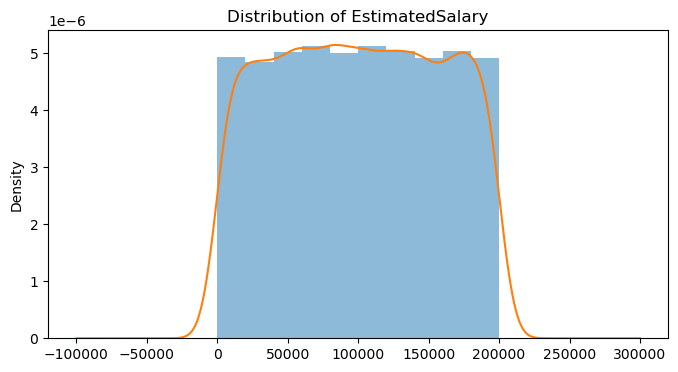

In [13]:
# Distribution plots for key numerical features

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for col in num_cols:
    plt.figure(figsize=(8,4))
    df1[col].plot.hist(density=True, alpha=0.5)  
    df1[col].plot.kde()  
    plt.title(f'Distribution of {col}')
    plt.show()

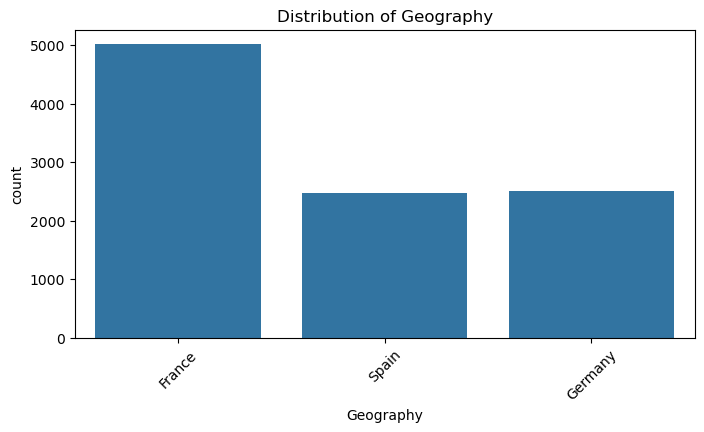

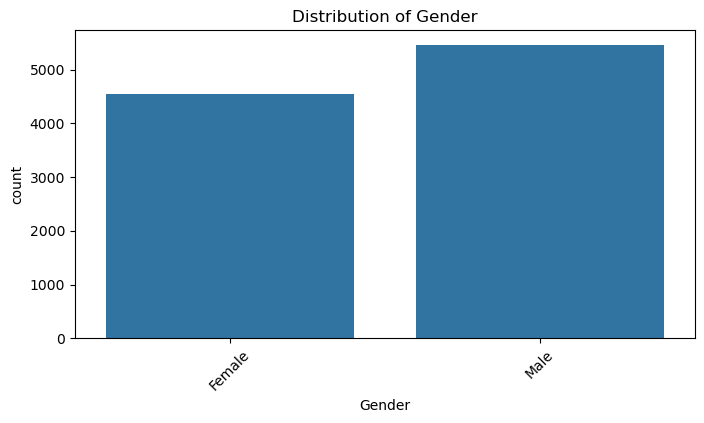

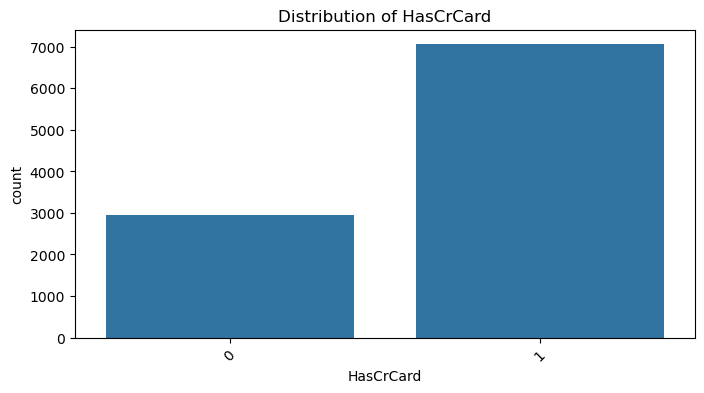

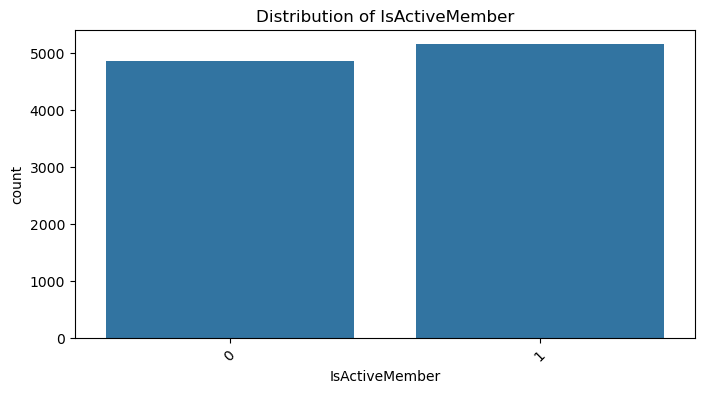

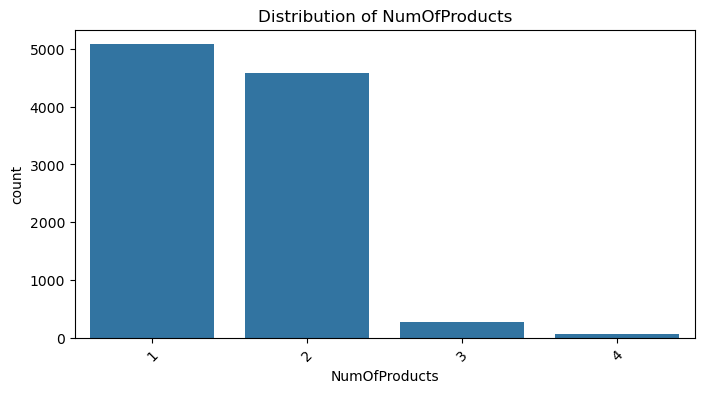

In [14]:
# Count plots for categorical features

cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df1)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

0    0.7963
1    0.2037
Name: Exited, dtype: float64


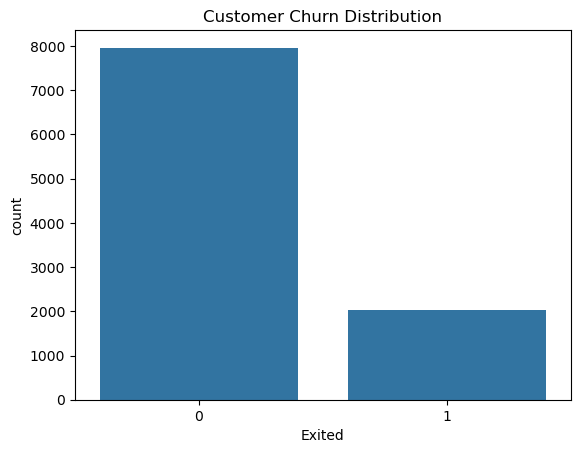

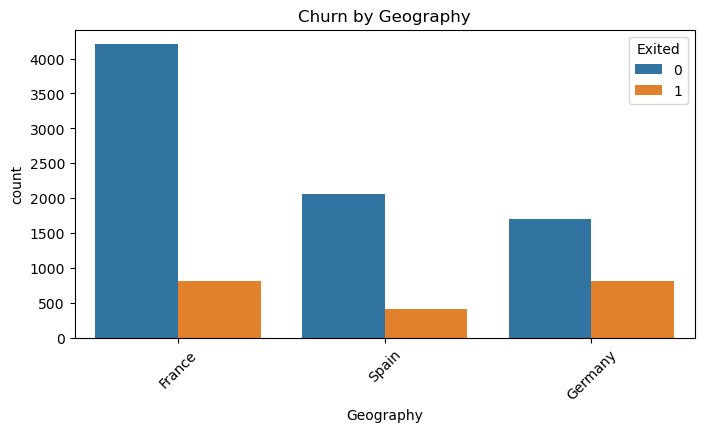

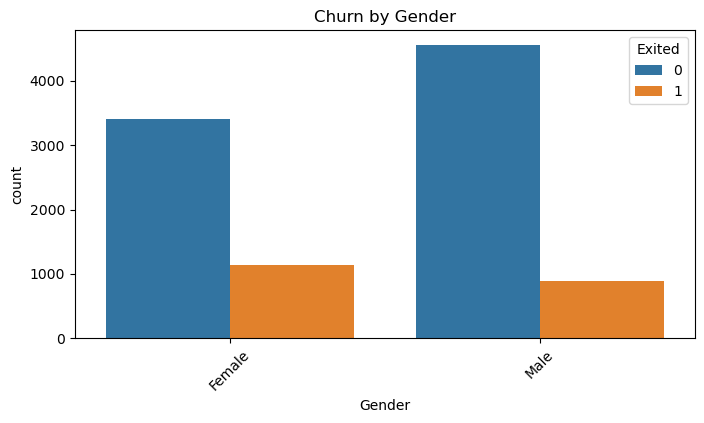

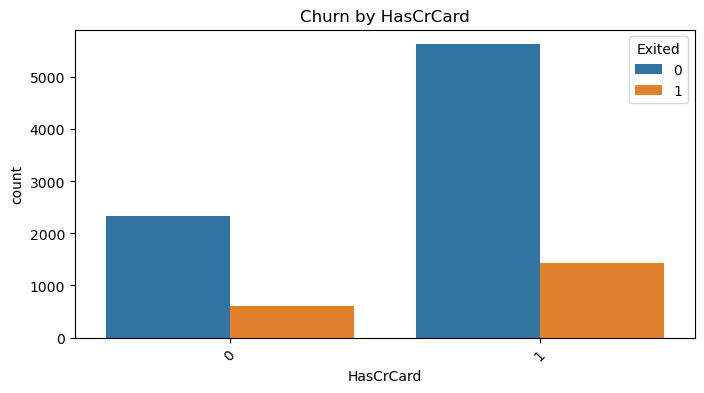

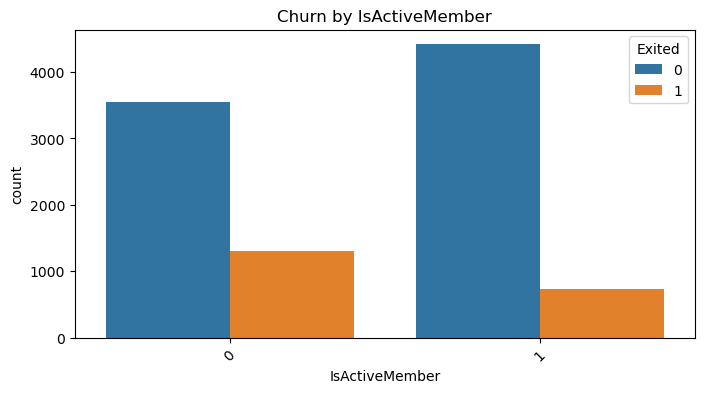

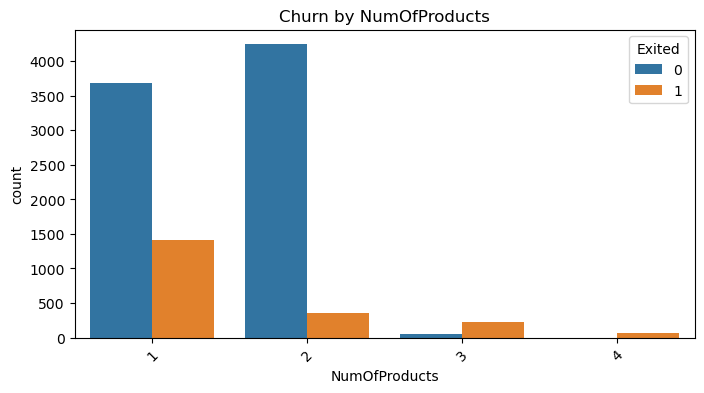

In [15]:
# Checking class balance

print(df1['Exited'].value_counts(normalize=True))

sns.countplot(x='Exited', data=df1)
plt.title('Customer Churn Distribution')
plt.show()

# churn by different categories

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.show()

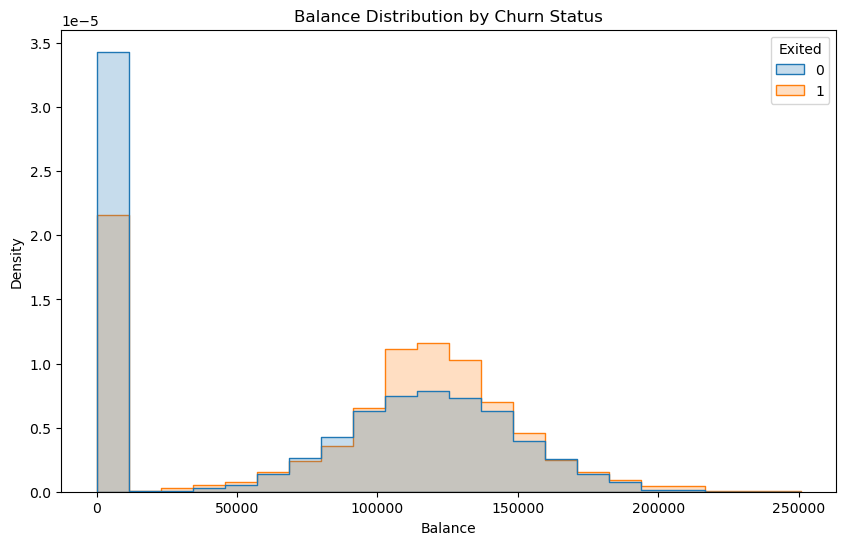

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(x='Balance', hue='Exited', data=df1, element='step', stat='density', common_norm=False)
plt.title('Balance Distribution by Churn Status')
plt.show()

In [17]:
df2 = df1.copy()

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [19]:
print(df2['Gender'].value_counts())
df2['Geography'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
df2.drop(['Surname'],axis=1,inplace=True)
df2['Geography'] = df2['Geography'].map({'France':0,'Spain':1,'Germany':2})
df2['Gender'] = df2['Gender'].map({'Male':0,'Female':1})

In [21]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [22]:
from sklearn.utils import resample

# Separate majority and minority classes
df2_majority = df2[df2['Exited']==0]
df2_minority = df2[df2['Exited']==1]

# Upsample minority class
df2_minority_upsampled = resample(df2_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df2_majority),  # Match majority
                                 random_state=42)

# Combine and shuffle
df2_upsampled = pd.concat([df2_majority, df2_minority_upsampled]).sample(frac=1)

In [23]:
df2_upsampled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4175,741,1,0,43,0,0.00,2,1,1,2920.63,1
5559,850,2,0,36,5,119984.07,1,1,0,191535.11,1
4143,500,0,0,45,2,109162.82,1,1,1,126145.08,0
9443,596,2,0,54,1,123544.00,1,1,1,120314.75,1
7116,588,2,0,49,6,132623.76,3,1,0,36292.94,1
...,...,...,...,...,...,...,...,...,...,...,...
6991,518,2,0,29,9,125961.74,2,1,0,160303.08,1
7195,675,0,1,33,6,0.00,2,1,0,34045.61,0
6279,757,1,1,55,9,117294.12,4,1,0,94187.47,1
1554,628,0,0,34,4,158741.43,2,1,1,126192.54,0


In [24]:
x = df2_upsampled.drop(['Exited'],axis=1)
y = df2_upsampled['Exited']

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=df2_upsampled['Exited'])

In [26]:
print(len(X_train) , len(y_train), len(X_test), len(y_test))

12740 12740 3186 3186


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
models = {
    'Logistic Regression': LogisticRegression(penalty='l2',
    dual=False,
    tol=0.0001,
    C=0.2,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='sag',
    max_iter=100,
    multi_class='auto',
    verbose=1,
    warm_start=False,
    n_jobs=-1,
    l1_ratio=None,),
    
    'KNN': KNeighborsClassifier(n_neighbors=5,
    weights='distance',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=-1,),
    
    'Decision Tree': DecisionTreeClassifier(max_depth= 5,
    min_samples_split=10,  # Fewer splits = simpler tree
    min_samples_leaf=5,    # Larger leaves = less overfitting
    max_features= 0.5,      # Random subset of features per split
    criterion= 'gini',
    splitter= 'random',     # Random splits can speed up training
    random_state= 42),
    
    'Random Forest': RandomForestClassifier(n_estimators=200,
    criterion='gini',
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=None,
    verbose=1,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)
}

# Train each model
fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(f"{name} trained.")

# Optionally evaluate
for name, model in fitted_models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 0 seconds
Logistic Regression trained.
KNN trained.
Decision Tree trained.


F:\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Random Forest trained.
Logistic Regression Accuracy: 0.58
KNN Accuracy: 0.80
Decision Tree Accuracy: 0.73
Random Forest Accuracy: 0.82


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


In [32]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score

# Chosen Model
rf = RandomForestClassifier(random_state=42)

# parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees
    'max_depth': [5, 10, 12 , 13],      # Tree depth (None = no limit)
    'min_samples_split': [2, 5, 7, 10], # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 3,4],   # Minimum samples per leaf
    'max_features': ['sqrt', 'log2' , 'sqrt'] # Features to consider per split
}

# Define cross-validation strategy (StratifiedKFold for classification)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scoring metric Used
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted')
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='accuracy',  # Refit the best model on the full dataset
    n_jobs=-1,        # Use all CPU cores
    verbose=1         # Print progress
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.9095761381475667
Test accuracy: 0.9249843063402385


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1593
           1       0.90      0.95      0.93      1593

    accuracy                           0.92      3186
   macro avg       0.93      0.92      0.92      3186
weighted avg       0.93      0.92      0.92      3186



In [ ]:
from joblib import dump

# Save the best model to a file
dump(best_rf, './Models/best_random_forest.joblib') 

In [35]:
# Later, load the model like this:
# from joblib import load
# best_rf = load('best_random_forest.joblib')

['best_random_forest.joblib']